# AirBnB : Predicting Room Rates & Room Availability in Austin, Texas

### Plan of Action:

- Obtaining the Data
- Data Cleaning
- Exploratory Analysis
- Data Interpretations
- Predictive Modelling
- Conclusions
- Future Work

### Obtaining the Data

For the purpose of this analysis I have chosen to use Airbnb stay data from Austin, Texas. The data is provided publically by Aibnb and can be found here: http://insideairbnb.com/get-the-data.html

For the first part of this project I have chosen to work with listings.csv which provides information on the room rate and other listing information. There are two addional datasets namely reviews.csv and calendar.csv which provides informaton on room availability throughout the calendar year and reviews data on the listings.

### Data Cleaning

First step is to import all the necessary libraries. From doing some research on the best libraries to use for ML and Data Exploration in Python, I've decided to primarily use: pandas, numpy, seaborn, datetime, matplotlib, math and sklearn.

In [82]:
# Importing Libraries 

import pandas as pd
import numpy as np
#pip install seaborn==0.9.0
import seaborn as sb
import datetime as dt
import math as mt
import matplotlib.pyplot as plt
#import collections as c
from collections import Counter
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error

Lets take the first look at listings.csv to see what information it contains. 

In [83]:
#Reading listings.csv to a dataframe

listings = pd.read_csv('listings.csv', low_memory=False, delimiter=',') 

#Count of number of rows and columns

entries = listings.shape[0]
features = listings.shape[1]

print("There are %s entries with %s features." % (entries, features))

#A neat listing of the features for our reference
print("Features:")
print(listings.columns.values)

There are 11250 entries with 106 features.
Features:
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about' 'host_response_time'
 'host_response_rate' 'host_acceptance_rate' 'host_is_superhost'
 'host_thumbnail_url' 'host_picture_url' 'host_neighbourhood'
 'host_listings_count' 'host_total_listings_count' 'host_verifications'
 'host_has_profile_pic' 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet' 'price'
 'weekly_price' 'monthly_price

Here, I included the low_memory parameter within the read_csv function because I got an error that columns had data of different data types.

In [84]:
#Lets take a look at the raw data, ensuring we display all columns
pd.set_option('display.max_columns', None)
listings.head(n = 5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20191112224534,2019-11-13,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,https://www.airbnb.com/rooms/5245,20191112224534,2019-11-13,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b3...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Aust

Initially, I only pulled the head of the data for 5 columns hoping, I would be able to see all the entries and features. However, I noticed that all features were not displayed. To solve this I used the set_option() function within the pandas library.

From breifly looking at the columns within the dataframe, I have identified certain columns that I do not feel I would use or would be useful to my analysis. Therefore, I'm going to subset the dataframe and only keep the columns I intend on using. 

Some considerations:
- Removing most variabes that require text processing
- Removing Country Code, Country, City and State since I know we are using Austin Data.

In [85]:
#Removing unnecessary columns
remove = ['listing_url','scrape_id', 'last_scraped', 'thumbnail_url','medium_url','picture_url',
           'xl_picture_url','host_id','name','summary','space', 'description','experiences_offered',
           'neighborhood_overview','notes', 'transit','access','interaction','house_rules', 'host_url',
            'host_name','host_location','host_about','host_since', 'host_response_time','host_response_rate','host_acceptance_rate',
  'host_thumbnail_url','host_picture_url','first_review','last_review',
 'host_neighbourhood', 'host_verifications','host_has_profile_pic','host_identity_verified',
 'street', 'market', 'smart_location','country_code','country', 'is_location_exact', 'calendar_last_scraped','city', 'state', 'amenities',
 'minimum_minimum_nights','maximum_minimum_nights',
 'minimum_maximum_nights','maximum_maximum_nights',
'minimum_nights', 'maximum_nights', 
 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated',
 'number_of_reviews_ltm', 'requires_license','license','jurisdiction_names','neighbourhood_group_cleansed','host_total_listings_count']

listings.drop(remove, axis=1, inplace=True)
features = listings.shape[1]

#To keep track of feature and entry counts
print('Number of entries are:', entries)
print('Number of features are:', features)
listings.head(n=5)

Number of entries are: 11250
Number of features are: 46


,id,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,t,3.0,East Downtown,78702,78702,30.27750,-97.71398,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,t,0,0,0,0,24,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,t,3.0,East Downtown,78702,78702,30.27577,-97.71379,House,Private room,2,1.0,1.0,2.0,Real Bed,NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,t,0,0,0,0,9,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,5456,t,1.0,East Downtown,78702,78702,30.26112,-97.73448,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,t,10,24,54,304,508,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,5769,t,1.0,SW Williamson Co.,78729,78729,30.45596,-97.78370,House,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,t,0,3,13,13,257,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,t,t,1,0,1,0,2.20
4,6413,t,1.0,Travis Heights,78704,78704,30.24829,-97.73726,Guesthouse,Entire home/apt,2,1.0,NaN,1.0,Real Bed,550.0,$99.00,$700.00,"$1,900.00",NaN,$50.00,2,$25.00,t,14,14,14,14,104,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86


Next I would want to take a look at summary statistics to check for data issues.Additionally, converting some numerical data of the wrong type (Example: Extra People) to float point values is also desirable. 

The next few pieces of code tager these objectives:

- Using describe to look at summary information
- Checking for duplicate listings
- Looking into fields that have many NA values
- Converting numerical data to float point values

In [86]:
#Dropping duplicate listings by 'id' if there are any
listings.drop_duplicates(subset = ['id']).reset_index()

#To keep track of feature and entry counts
print('Number of entries are:', entries)
print('Number of features are:', features)
listings.head(n=5)

#Summary Statistics
listings.describe()

Number of entries are: 11250
Number of features are: 46


,id,host_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.125000e+04,11247.000000,11250.000000,11250.000000,11250.000000,11250.000000,11235.000000,11245.000000,11238.000000,204.00000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,8927.000000,8922.000000,8922.000000,8921.000000,8921.000000,8916.000000,8917.000000,11250.000000,11250.000000,11250.000000,11250.000000,9037.000000
mean,2.166470e+07,52.738686,78722.403022,30.278365,-97.751618,4.678222,1.544326,1.782570,2.526606,1216.50000,2.411556,11.416889,25.466578,41.113156,133.116444,30.190489,96.212389,9.780206,9.625420,9.852483,9.864365,9.779834,9.605473,10.200711,8.982933,0.700356,0.368089,1.782883
std,1.209558e+07,244.641487,20.595333,0.057495,0.057511,3.229415,0.896569,1.281986,2.803104,799.86028,2.702884,11.255282,22.970194,35.487876,134.691628,59.664593,6.761280,0.672617,0.810075,0.595185,0.556845,0.587094,0.770856,28.247721,27.720297,2.683581,3.976359,2.096243
min,2.265000e+03,0.000000,78701.000000,30.098080,-98.053550,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.146491e+07,1.000000,78704.000000,30.244350,-97.768415,2.000000,1.000000,1.000000,1.000000,600.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.280000
50%,2.247189e+07,1.000000,78721.000000,30.267325,-97.745055,4.000000,1.000000,1.000000,2.000000,1150.00000,1.000000,10.000000,25.000000,44.000000,87.000000,7.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,1.020000
75%,3.246803e+07,4.000000,78744.000000,30.299288,-97.721013,6.000000,2.000000,2.000000,3.000000,1600.00000,2.000000,22.000000,48.000000,76.000000,266.000000,31.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000,1.000000,0.000000,2.650000
max,4.006306e+07,1826.000000,78759.000000,30.512280,-97.560620,33.000000,18.500000,23.000000,132.000000,4200.00000,32.000000,30.000000,60.000000,90.000000,365.000000,879.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,165.000000,165.000000,29.000000,48.000000,37.360000


In order to quickly see which features have the most missing data or NA values - it is easier to plot a bar chart of the counts of NA values per feature we are considering. 

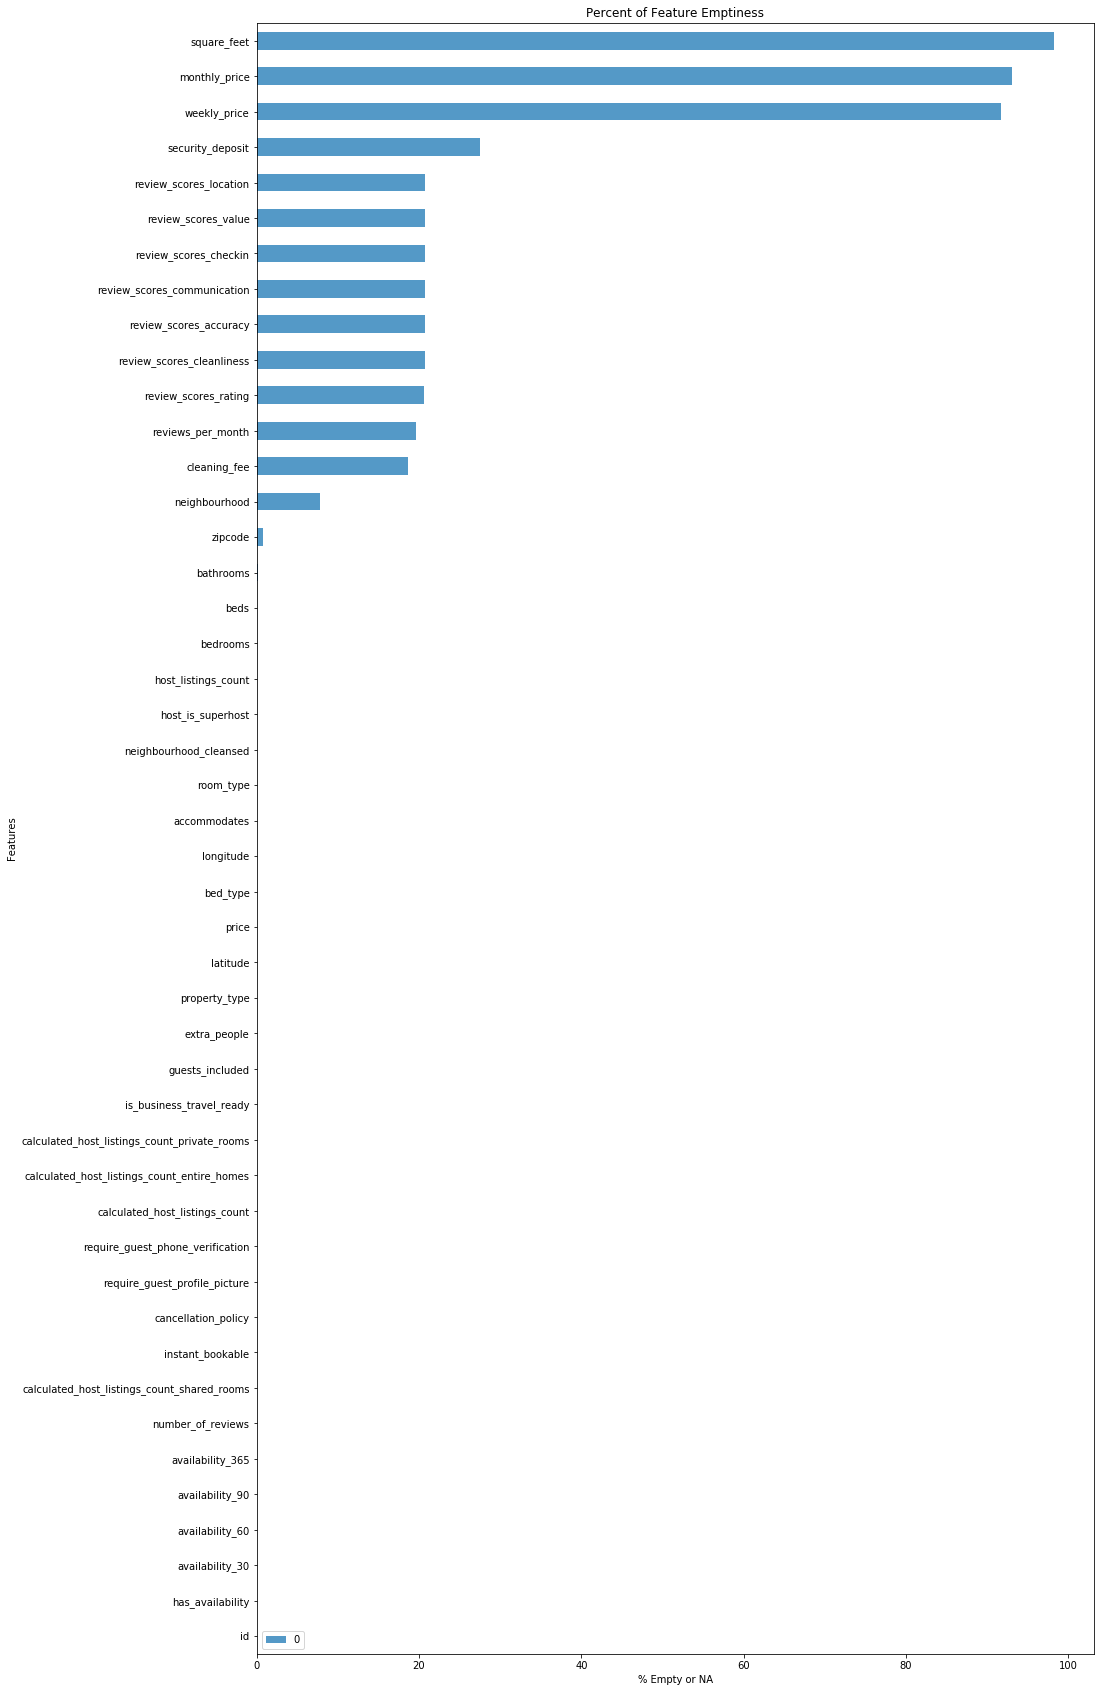

In [87]:
#Function to calculate % of empty features
def percent_empty(df):
    bools = df.isnull().tolist()
    percent_empty = (float(bools.count(True)) / float(len(bools)))*100
    return percent_empty, float(bools.count(True))


# Creating variables to store emptiness values
empty = []
missing_columns = []


#Computing emptiness for each feature function
for i in range(0, listings.shape[1]):
    p, n = percent_empty(listings.iloc[:,i])
    if n > 0:
        missing_columns.append(listings.columns.values[i])
    empty.append(round((p), 4))
    
empty_dict = dict(zip(listings.columns.values.tolist(), empty))


# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0,ascending=[True])
a = empty.plot(kind = 'barh', color='#5499C7', figsize = (15,30))
a.set_ylabel('Features')
a.set_xlabel('% Empty or NA')
a.set_title('Percent of Feature Emptiness')
plt.show()

Looking at the bar chart above it is evident that features like square feet, monthly price, weekly price have over 90% of their entries as NA and should eb removed since they would not be useful to my analysis. We are choosing to keep all the other features which have less than 30% of NAs in our analysis. 

In [88]:
remove = ['weekly_price', 'monthly_price', 'square_feet']

listings.drop(remove, axis=1, inplace=True)
features = listings.shape[1]

print('Number of entries:', entries)
print('Number of features:', features)
listings.head(n=5)

Number of entries: 11250
Number of features: 43


,id,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,t,3.0,East Downtown,78702,78702,30.27750,-97.71398,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,$225.00,$500.00,$100.00,4,$30.00,t,0,0,0,0,24,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,t,3.0,East Downtown,78702,78702,30.27577,-97.71379,House,Private room,2,1.0,1.0,2.0,Real Bed,$100.00,$500.00,$75.00,2,$35.00,t,0,0,0,0,9,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,5456,t,1.0,East Downtown,78702,78702,30.26112,-97.73448,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$95.00,$100.00,NaN,2,$45.00,t,10,24,54,304,508,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,5769,t,1.0,SW Williamson Co.,78729,78729,30.45596,-97.78370,House,Private room,2,1.0,1.0,1.0,Real Bed,$40.00,NaN,NaN,2,$0.00,t,0,3,13,13,257,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,t,t,1,0,1,0,2.20
4,6413,t,1.0,Travis Heights,78704,78704,30.24829,-97.73726,Guesthouse,Entire home/apt,2,1.0,NaN,1.0,Real Bed,$99.00,NaN,$50.00,2,$25.00,t,14,14,14,14,104,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86


In [89]:
listings['price'] = listings['price'].apply(lambda s: float(s[1:].replace(',','')))
listings['extra_people'] = listings['extra_people'].apply(lambda s: float(s[1:].replace(',','')))

float_coversion = ['latitude', 'longitude', 'accommodates',
            'bathrooms', 'bedrooms', 'beds', 'guests_included', 
            'extra_people',
            'availability_365', 'review_scores_rating', 
            'review_scores_accuracy', 'review_scores_cleanliness', 
            'review_scores_checkin', 'review_scores_communication', 
            'review_scores_location', 'review_scores_value', 'host_listings_count', 'number_of_reviews']

#Loop to convert above values to float
for f in float_coversion:
    listings[f] = listings[f].astype(float)

print('Number of entries:', entries)
print('Number of features:', features)
listings.head(n=5)

Number of entries: 11250
Number of features: 43


,id,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,t,3.0,East Downtown,78702,78702,30.27750,-97.71398,House,Entire home/apt,4.0,2.0,2.0,2.0,Real Bed,225.0,$500.00,$100.00,4.0,30.0,t,0,0,0,0.0,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,t,3.0,East Downtown,78702,78702,30.27577,-97.71379,House,Private room,2.0,1.0,1.0,2.0,Real Bed,100.0,$500.00,$75.00,2.0,35.0,t,0,0,0,0.0,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,5456,t,1.0,East Downtown,78702,78702,30.26112,-97.73448,Guesthouse,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,95.0,$100.00,NaN,2.0,45.0,t,10,24,54,304.0,508.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,5769,t,1.0,SW Williamson Co.,78729,78729,30.45596,-97.78370,House,Private room,2.0,1.0,1.0,1.0,Real Bed,40.0,NaN,NaN,2.0,0.0,t,0,3,13,13.0,257.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,t,t,1,0,1,0,2.20
4,6413,t,1.0,Travis Heights,78704,78704,30.24829,-97.73726,Guesthouse,Entire home/apt,2.0,1.0,NaN,1.0,Real Bed,99.0,NaN,$50.00,2.0,25.0,t,14,14,14,14.0,104.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86


For the purpose of this exercise we do not want to consider any entries that have 0 values. An Airbnb listing with 0 bedrooms or 0 bathrooms does not make sense.

In [90]:
#Subsetting listings to only include non 0 values in key factors import to our analysis
listings = listings[listings.price != 0]
listings = listings[listings.beds != 0]
listings = listings[listings.bathrooms != 0]
listings = listings[listings.bedrooms != 0]

#Checking entry count after removal

print('Number of entries removed: ', entries - listings.shape[0])
entries = listings.shape[0]

#Count check
print('Number of entries:', entries)
print('Number of features:', features)

Number of entries removed:  827
Number of entries: 10423
Number of features: 43


### Exploratory Analysis and Data Interpretations

Now, lets put ourselves the mind of an AirBnB Guest. If I were to travel to Austin where would I want to stay? I might want easy access to Austin Downtown or The Circuit of The Americas. Maybe I'd rather stay close to the airport to catch an early flight. Therefore, it might make sense for me to explore which neighborhoods have the most bookings. I will look at the top 20 neighbourhoods for my analysis.

Secondly, I have always wanted to live in an AirBnB that is entirely my own. Let's see if most listings are entire suites due to demand and favourability. 

#### Q1: Which neighbourhoods have the most bookings?

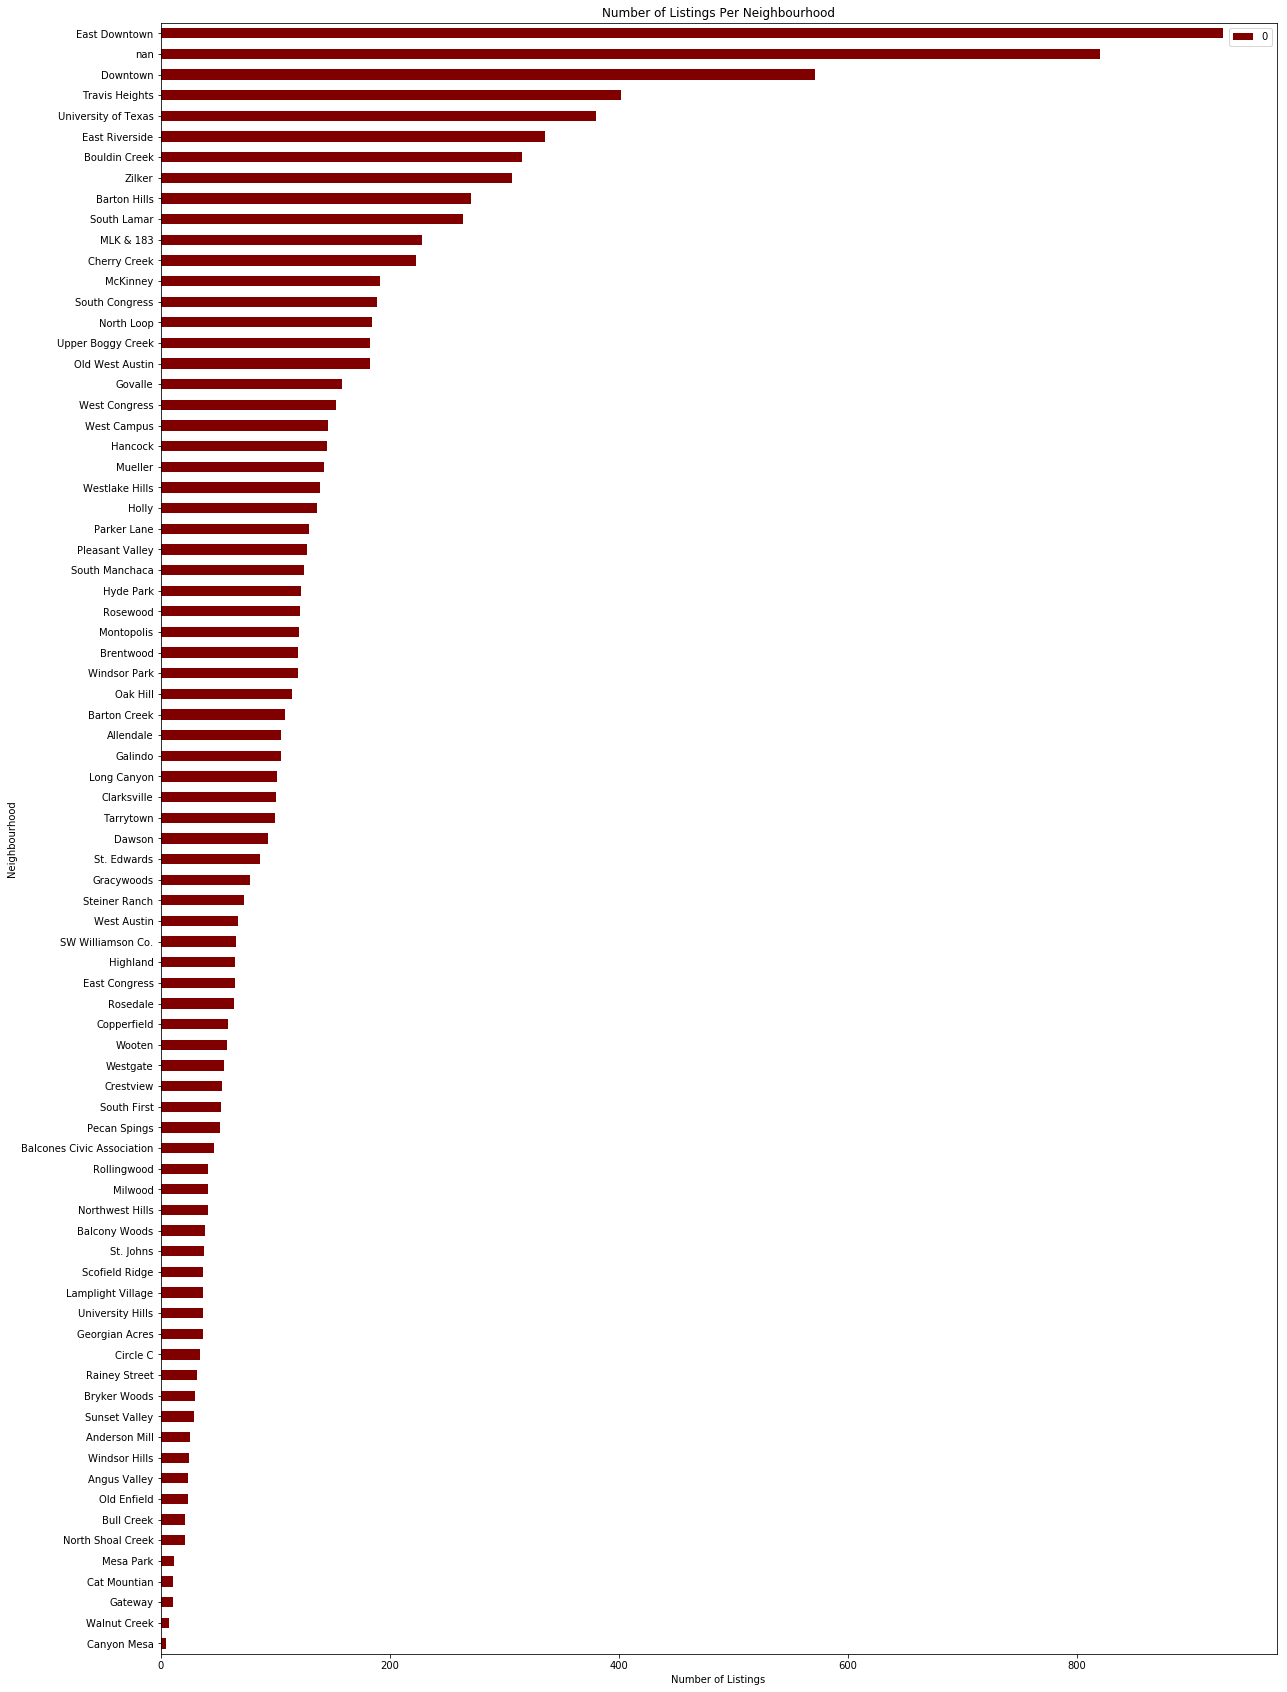

Number of Neighbourhoods: 39
Number of entries removed:  1698
Number of entries: 8725
Number of features: 43


In [91]:
#Counting number of bookings in each neighbourhood
count_neighbourhood = Counter(listings.neighbourhood)
sort_cn = pd.DataFrame.from_dict(count_neighbourhood, orient='index').sort_values(by=0)

#From looking at the raw data, top neighbourhoods tend to have ~100 or more listings. Therefore, we will only consider these.
for i in list(count_neighbourhood):
    if count_neighbourhood[i] < 100:
        del count_neighbourhood[i]
        listings = listings[listings.neighbourhood != i]
                
#Bar Chart of Neighbourhood Counts
a = sort_cn.plot(kind='barh', figsize = (20,30), color = '#800000')
a.set_title("Number of Listings Per Neighbourhood")
a.set_ylabel("Neighbourhood")
a.set_xlabel("Number of Listings")
plt.show()

print("Number of Neighbourhoods:", len(count_neighbourhood))
print('Number of entries removed: ', entries - listings.shape[0])
entries = listings.shape[0]

#Count check
print('Number of entries:', entries)
print('Number of features:', features)

#### Q2: What type of room has the most demand for in Austin?

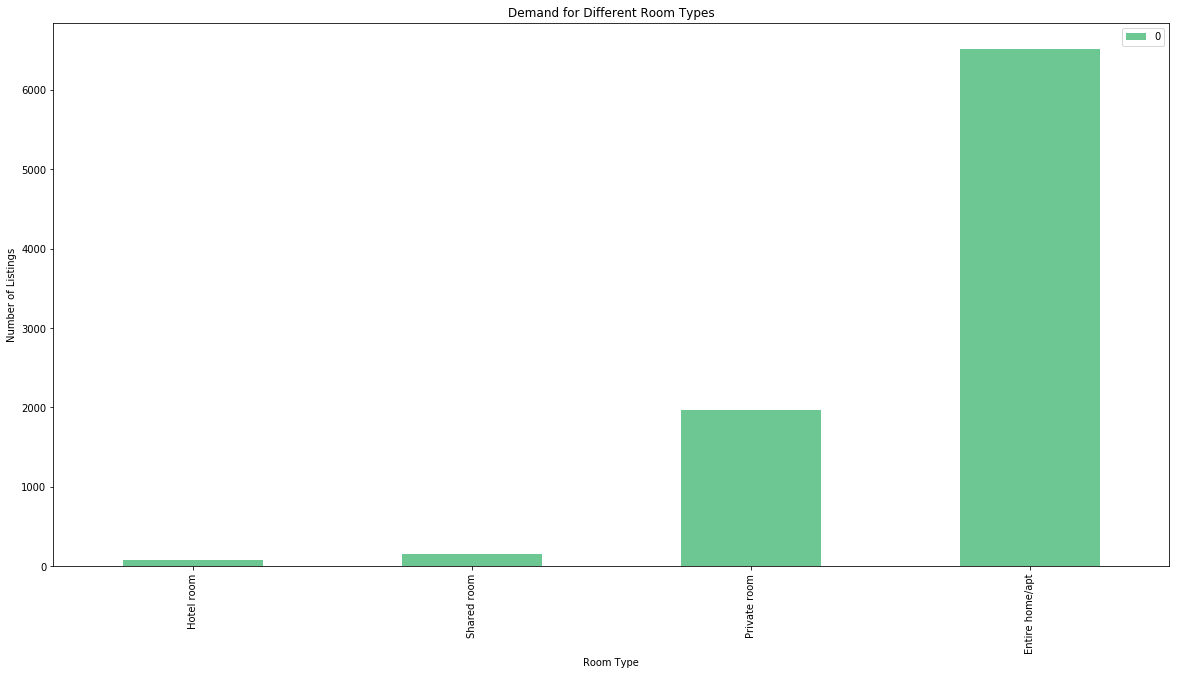

In [92]:
#Types of rooms that are most preferred
room_type_count = Counter(listings.room_type)
rt_sorted = pd.DataFrame.from_dict(room_type_count, orient='index').sort_values(by=0)

# Plot number of listings in each neighbourhood
a = rt_sorted.plot(kind='bar', figsize = (20,10), color = '#52BE80' , alpha = 0.85)
a.set_title("Demand for Different Room Types")
a.set_xlabel("Room Type")
a.set_ylabel("Number of Listings")
plt.show()

From the above plot we can tell, the most demand is for Entire Home/Apartment. We know that this would surely cost more. Therefore, this variable will show a strong corellation to price. 

#### Q3: What is the Average Rating of an Airbnb in Austin? Do the listings with the most reviews have the highest ratings?

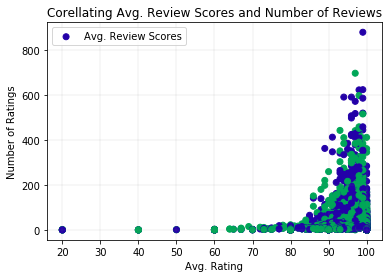

In [93]:
#Corellation between number of reviews and average rating; using scatter plot
colors = ['#2300A8', '#00A658']

#Scatterplot
plt.scatter(listings.review_scores_rating,listings.number_of_reviews, color = colors)

#titles and axis labels
plt.title("Corellating Avg. Review Scores and Number of Reviews")
plt.xlabel("Avg. Rating")
plt.ylabel("Number of Ratings")


#removing top and right borders
#plt.spines['right'].set_visible(False)
#plt.spines['top'].set_visible(False)

#gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#legend
plt.legend(['Avg. Review Scores','Number of Reviews'],loc="upper left")

plt.show()

Having worked in the Hospitality Industry, one of the clients I worked with was AirBnB. During this time I saw a spike in AirBnB listings with time and that would only be because of rising demand for AirBnB listings. Therefore, customers have to be happy with their stay surely? However, looking at the scatter plot above after studying correlation between avg rating and number of reviews we can see that there appears to be some kind of bias in the rating and reviews process. Since, guests tend to rent a portion of another person's personal house - perhaps, they feel uneasy leaving  bad review which would directly affect an owner as opposed to people leaving negative comments on a major hotel since corporations have much more business/income and resources catered toward guest hospitality. 

This revelation is curious, therefore I would want to see how many more features correlate strongly with other features.

For the purpose of this exercise it would be easier for me to convert categorical variables to a variable of numerical or float type so that it can be better used in ML model building. After doing some research I found out this is called categorical encoding and the function below is frequently used by many ML programmers. 

In [94]:
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array

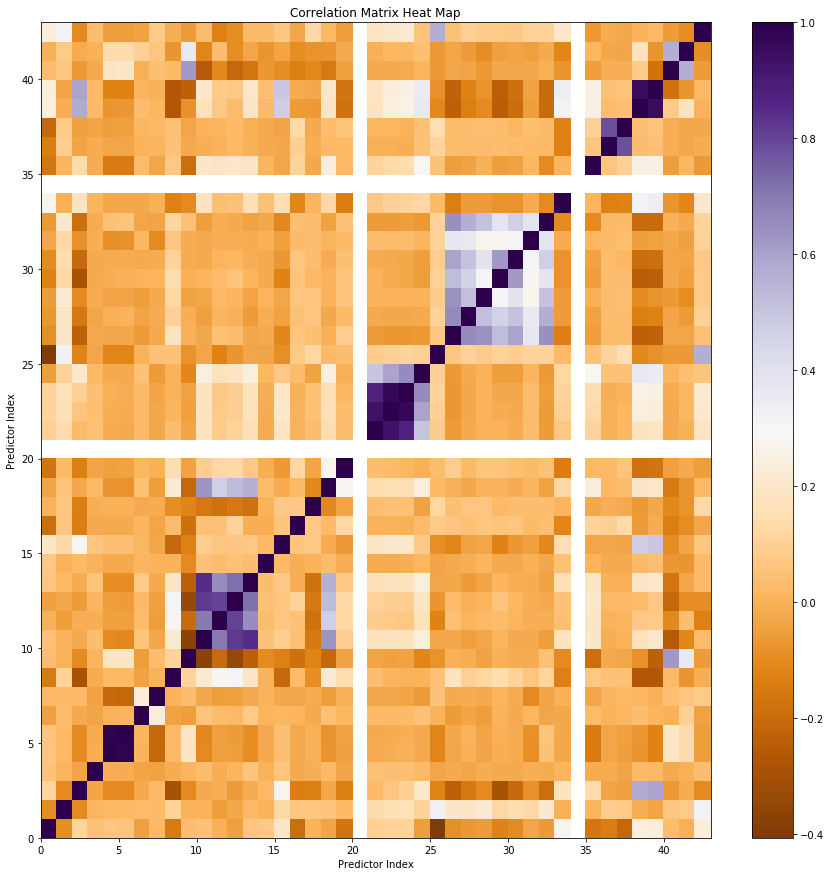

In [95]:
#Creating a temporary listings dataset
listings_temp = listings.copy()

#Deleting NA values so that we dont get "mixed data type error"
listings_temp = listings_temp.dropna(axis=0)

#Applying Encoding function to the temporary listings variable
listings_temp = listings_temp.apply(encode_categorical)

# Compute matrix of correlation coefficients
correlation_matrix = np.corrcoef(listings_temp.T)

#Creating a dataframe to reference with a visual heatmap
correlation_df = pd.DataFrame(data = correlation_matrix, columns = listings_temp.columns, 
             index = listings_temp.columns)

#Heatmap to see quickly if there are features that show high correlation: Orange to Purple Scale; Orange Low, Purple High
plt.figure(figsize=(15, 15))
plt.pcolor(correlation_matrix, cmap='PuOr')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Correlation Matrix Heat Map')
plt.colorbar()

plt.show()

In [96]:
#Inspecting the correlation dataframe
correlation_df

,id,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,-0.095120,0.116052,0.050386,0.061924,0.059392,-0.044473,0.022186,-0.152870,0.033606,0.053958,-0.004211,-0.048149,0.061182,0.072211,0.194310,-0.188755,0.002184,-0.034898,-0.166607,NaN,0.102111,0.111127,0.111331,-0.050110,-0.406106,-0.088256,-0.069276,-0.058552,-0.124865,-0.099491,-0.031253,-0.060171,0.269823,NaN,-0.160347,-0.138189,-0.211616,0.245396,0.235364,0.034432,-0.001324,0.234135
host_is_superhost,-0.095120,1.000000,-0.102988,0.007978,0.017637,0.017814,0.029993,0.027149,0.108528,0.003415,0.005174,-0.049614,-0.022979,0.017723,0.003051,0.127151,0.069270,0.069655,0.058729,0.020007,NaN,0.139378,0.158350,0.161744,0.105962,0.325820,0.196633,0.188623,0.215920,0.125100,0.148130,0.129761,0.210785,-0.004870,NaN,0.008446,0.088515,0.079880,-0.009582,-0.037862,0.062981,0.079380,0.320321
host_listings_count,0.116052,-0.102988,1.000000,-0.034023,-0.099893,-0.099959,-0.016499,0.026958,-0.291956,-0.100665,-0.017103,-0.008002,-0.057583,-0.011613,0.017976,0.278537,-0.142338,-0.135484,-0.024478,-0.133145,NaN,0.027545,0.064573,0.099722,0.205326,-0.116033,-0.234204,-0.158468,-0.101395,-0.293241,-0.207229,-0.083760,-0.190090,0.172854,NaN,0.141105,-0.036295,-0.047058,0.581688,0.594592,-0.063767,-0.011589,-0.100791
neighbourhood,0.050386,0.007978,-0.034023,1.000000,-0.008325,-0.015079,-0.034991,-0.039146,-0.010673,0.007523,0.035448,-0.005571,0.007620,0.056424,0.001809,0.063336,-0.016535,-0.009333,0.019521,-0.035706,NaN,0.044980,0.042658,0.040584,0.018572,-0.027654,-0.017137,-0.029145,-0.015460,-0.020746,-0.020279,-0.007143,-0.015269,0.006714,NaN,-0.012657,-0.015062,-0.037765,0.026539,0.019093,-0.017404,-0.003320,0.033632
neighbourhood_cleansed,0.061924,0.017637,-0.099893,-0.008325,1.000000,0.984698,0.003304,-0.207203,0.017661,0.181812,-0.102461,-0.045388,-0.053219,-0.095179,-0.019040,0.040140,-0.020474,-0.003825,-0.074538,-0.044874,NaN,-0.015934,-0.008318,-0.003654,-0.018072,-0.113925,-0.031818,-0.000819,-0.037744,-0.005395,-0.013128,-0.088336,0.055118,-0.024180,NaN,-0.144097,-0.030937,-0.049319,-0.071790,-0.124906,0.190646,0.139592,-0.053192
zipcode,0.059392,0.017814,-0.099959,-0.015079,0.984698,1.000000,0.010678,-0.210028,0.019508,0.185079,-0.107604,-0.047591,-0.057679,-0.097869,-0.019680,0.040267,-0.021227,-0.003555,-0.076730,-0.039753,NaN,-0.017773,-0.011294,-0.006036,-0.020026,-0.112106,-0.027081,0.001374,-0.035697,-0.002588,-0.011740,-0.084235,0.055492,-0.024132,NaN,-0.145786,-0.029590,-0.048252,-0.070383,-0.123891,0.194951,0.138134,-0.053445
latitude,-0.044473,0.029993,-0.016499,-0.034991,0.003304,0.010678,1.000000,0.230217,-0.043395,-0.054270,0.057302,0.031301,0.021493,0.079123,0.011119,0.014457,0.009018,-0.016199,0.045631,0.013384,NaN,0.026606,0.024469,0.024564,0.054362,0.004240,-0.055007,-0.033347,-0.050171,0.000604,-0.018486,0.015368,-0.027362,-0.026974,NaN,0.032979,0.003206,0.015462,0.034962,0.010216,-0.005046,0.099280,-0.041337
longitude,0.022186,0.027149,0.026958,-0.039146,-0.207203,-0.210028,0.230217,1.000000,0.005146,0.033364,-0.023228,-0.049495,-0.046997,-0.020158,0.005136,-0.023848,-0.030827,-0.013851,-0.050336,-0.005113,NaN,-0.022232,-0.024213,-0.034018,-0.057745,0.050600,-0.020086,-0.015822,-0.017146,0.010839,-0.012210

Most data scientists recommend that if any variable shows a correlation of 0.5 or above, it will not add value to model building due to duplicates likely causing the correlation. Therefore, I will not be considering there on the basis of inspecting the values above. Neighbourhood cleansed looks similar to zipcode, therefore removing.

In [97]:
high_correlation = ["availability_30", "availability_60","availability_90",
                    "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
                    "calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
                    "require_guest_profile_picture","neighbourhood_cleansed","id","security_deposit","cleaning_fee"]

listings.drop(high_correlation, axis=1, inplace=True)
features = listings.shape[1]

print('Number of entries:', entries)
print('Number of features:', features)
listings.head(n=5)

Number of entries: 8725
Number of features: 31


,host_is_superhost,host_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_phone_verification,reviews_per_month
0,t,3.0,East Downtown,78702,30.27750,-97.71398,House,Entire home/apt,4.0,2.0,2.0,2.0,Real Bed,225.0,4.0,30.0,t,0.0,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,f,strict_14_with_grace_period,f,0.18
1,t,3.0,East Downtown,78702,30.27577,-97.71379,House,Private room,2.0,1.0,1.0,2.0,Real Bed,100.0,2.0,35.0,t,0.0,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,f,strict_14_with_grace_period,f,0.07
2,t,1.0,East Downtown,78702,30.26112,-97.73448,Guesthouse,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,95.0,2.0,45.0,t,304.0,508.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,3.90
4,t,1.0,Travis Heights,78704,30.24829,-97.73726,Guesthouse,Entire home/apt,2.0,1.0,NaN,1.0,Real Bed,99.0,2.0,25.0,t,14.0,104.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,0.86
5,t,2.0,Zilker,78704,30.26027,-97.76503,Guesthouse,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,129.0,2.0,25.0,t,176.0,220.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,2.21


### Predictive Modelling

In [98]:
#Moving Listings to the last column of the dataframe to be able to spot it quickly
y = listings[['price']]
del listings['price']
listings = listings.join(y)

#Dropping NA entries
listings = listings.dropna(axis=0)
L = listings.iloc[:, 0:-1]

#Listing price in terms of log in order to account for less severity in case of price increase or decrease 
#(since there in spread in prices, log is not suggested if prices are closer together)
P = np.log(listings['price'])

print('Number of entries:', L.shape[0])
print('Number of features:', L.shape[1])
listings.head(n=5)

Number of entries: 6198
Number of features: 30


,host_is_superhost,host_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_phone_verification,reviews_per_month,price
0,t,3.0,East Downtown,78702,30.27750,-97.71398,House,Entire home/apt,4.0,2.0,2.0,2.0,Real Bed,4.0,30.0,t,0.0,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,f,strict_14_with_grace_period,f,0.18,225.0
1,t,3.0,East Downtown,78702,30.27577,-97.71379,House,Private room,2.0,1.0,1.0,2.0,Real Bed,2.0,35.0,t,0.0,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,f,strict_14_with_grace_period,f,0.07,100.0
2,t,1.0,East Downtown,78702,30.26112,-97.73448,Guesthouse,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,2.0,45.0,t,304.0,508.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,3.90,95.0
5,t,2.0,Zilker,78704,30.26027,-97.76503,Guesthouse,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,2.0,25.0,t,176.0,220.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,2.21,129.0
7,t,12.0,Travis Heights,78704,30.24503,-97.74075,House,Entire home/apt,5.0,1.0,2.0,2.0,Real Bed,3.0,0.0,t,128.0,90.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,1.09,550.0


Looking at the Airbnb dataset for Austin, we have columns that contains categorical data that does not have a specific order of preference - from reading some data science blogs, I have come to understand such columns need to be 'One Hot Encoded" so that it does not confuse the machine learning algorithmn. 

For personal education and reference in future:

One Hot Encoding: It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

In [99]:
#Defining what is considered a categorical variable
categorical = (L.dtypes.values != np.dtype('float64'))

#applying OHE to columns
categorical_var = []
for item in L.columns.values:
    if L[item].dtype != np.dtype('float64'):
        categorical_var.append(item)

# Last value is price
L_encoded = pd.get_dummies(L, prefix = categorical_var, columns = categorical_var)

#Keeping track of features to prevent data loss
print('Number of features:', L_encoded.shape[1])
print('Number of entries:',L_encoded.shape[0])
pd.options.display.max_columns = 150
L_encoded.head(n=5)

Number of features: 143
Number of entries: 6198


,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost_f,host_is_superhost_t,neighbourhood_Allendale,neighbourhood_Barton Creek,neighbourhood_Barton Hills,neighbourhood_Bouldin Creek,neighbourhood_Brentwood,neighbourhood_Cherry Creek,neighbourhood_Clarksville,neighbourhood_Downtown,neighbourhood_East Downtown,neighbourhood_East Riverside,neighbourhood_Galindo,neighbourhood_Govalle,neighbourhood_Hancock,neighbourhood_Holly,neighbourhood_Hyde Park,neighbourhood_Long Canyon,neighbourhood_MLK & 183,neighbourhood_McKinney,neighbourhood_Montopolis,neighbourhood_Mueller,neighbourhood_North Loop,neighbourhood_Oak Hill,neighbourhood_Old West Austin,neighbourhood_Parker Lane,neighbourhood_Pleasant Valley,neighbourhood_Rosewood,neighbourhood_South Congress,neighbourhood_South Lamar,neighbourhood_South Manchaca,neighbourhood_Tarrytown,neighbourhood_Travis Heights,neighbourhood_University of Texas,neighbourhood_Upper Boggy Creek,neighbourhood_West Campus,neighbourhood_West Congress,neighbourhood_Westlake Hills,neighbourhood_Windsor Park,neighbourhood_Zilker,zipcode_78701,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78719,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78725,zipcode_78726,zipcode_78729,zipcode_78730,zipcode_78731,zipcode_78733,zipcode_78735,zipcode_78736,zipcode_78737,zipcode_78738,zipcode_78741,zipcode_78742,zipcode_78744,zipcode_78745,zipcode_78746,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78751,zipcode_78752,zipcode_78756,zipcode_78757,zipcode_78759,zipcode_78767,zipcode_TX 78702,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,has_availability_t,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_phone_verification_f,require_guest_phone_verification_t
0,3.0,30.27750,-97.71398,4.0,2.0,2.0,2.0,4.0,30.0,0.0,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,0.18,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0
1,3.0,30.27577,-97.71379,2.0,1.0,1.0,2.0,2.0,35.0,0.0,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,0.07,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0
2,1.0,30.26112,-97.73448,3.0,1.0,1.0,2.0,2.0,45.0,304.0,508.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,3.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

First let us start with a simple linear regression model. For the purpose of this model lets split the train and test set in 10. I am choosing to use Mean Absolute Error because for metrics like prices, incomes, user engagement etc that tend to be closer together; many data science veterans suggest MAE over other error measuring metrics. 

In [100]:
#Linear Regression Model, Cross Validating with 5 folds
cross_val = KFold(10)
linreg = LinReg()

#Creating arrays for Mean Absolute Error and R^2 Values
MAE =[]
R2 = []

#Linear Regression Model
for train, test in cross_val.split(L_encoded):
    linreg.fit(L_encoded.iloc[train], P.iloc[train])
    P_predict = linreg.predict(L_encoded.iloc[test])
    R2.append(linreg.score(L_encoded.iloc[test], P.iloc[test]))
    MAE.append(median_absolute_error(P.iloc[test], P_predict))

#Scores 
linreg_r2_mean = np.mean(R2)
linreg_mae_mean = np.mean(MAE)
print('R^2 Score: ' + str(linreg_r2_mean))
print('MAE Score: ' + str(linreg_mae_mean))

R^2 Score: 0.530479416229
MAE Score: 0.398766741695


The R Squared and MAE values are not considered to be very good, but these provide a good baseline for us to try other prediction alogrithms and try to get a better score. 

Next, I will using Random Forest Model to predict AirBnB Prices. I'm choosing it because it tends to maintain accuracy and handle large propertions of data better. More trees will not lead to over fitting and datasets are handled with higher dimensionality. 

In [101]:
# Split into train and test
L_train, L_test, P_train, P_test = train_test_split(L_encoded, P, test_size=0.33, random_state=42)

In [109]:
#Random Forest Model
rf = RandomForestRegressor(oob_score = True)
rf.fit(L_train, P_train)
P_predict = rf.predict(L_test)

#Scores
randfor_r2_score = rf.score(L_test, P_test)
randofr_mae_score = median_absolute_error(P_test, P_predict)
print('R^2 Score: ' + str(randfor_r2_score))
print('MAE Score: ' + str(randofr_mae_score))

R^2 Score: 0.769077012843
MAE Score: 0.278187732561


While we see a slight improvement in the prediction scores, however, lets try building an Ensemble Model using tuning parameters, Cross Validation and Random Forest Regressor to see if this would yeild 

In [122]:
#Parameters considered
tuned_parameters = {
    "n_estimators": [10, 30, 50, 70, 90],
    "n_jobs": [-1],
    "oob_score": [True],
    "max_features": [None, 'sqrt', 'auto']
}

#3 fold Grid Search Random Forest Regressor
rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = tuned_parameters)
rf_tuned.fit(L_train, P_train)
rf_tuned.best_estimator_ 
P_predict = rf_tuned.predict(L_test)
rft_r2_score = rf_tuned.score(L_test, P_test)
rft_mae_score = median_absolute_error(P_test, P_predict)

#Scores
print('Best Parameters:', rf_tuned.best_params_)
print('R^2 Score: ' + str(rft_r2_score))
print('MAE Score: ' + str(rft_mae_score))

Best Parameters: {'max_features': None, 'n_estimators': 90, 'n_jobs': -1, 'oob_score': True}
R^2 Score: 0.793878576549
MAE Score: 0.26496063024


Through a simple grid search and increasing the number of estimators, we have achieved a slight score improvement. Due to computational difficulties, we cannot brute force attack the model with higher values for this parameter. 

Let us try a Tuned AdaBoost Regressor to see if this model improves our prediction scores.

In [139]:
from sklearn.ensemble import AdaBoostRegressor

#Parameters considered
tuned_parameters = {
    "n_estimators": [10, 30, 50, 70, 90],
    "learning_rate": [0.01, 0.1, 1],
    "loss" : ['linear', 'square']
}

#3 fold Grid Search AdaBoost Regressor
abr = GridSearchCV(AdaBoostRegressor(), cv=3, param_grid=tuned_parameters)
preds = abr.fit(L_train, P_train)
best = abr.best_estimator_ 
P_predict = abr.predict(L_test)
abr_r2_score = clf.score(L_test, P_test)
abr_mae_score = median_absolute_error(P_test, P_predict)

#Scores
print('Best Parameters:', abr.best_params_)
print('R^2 score: ' + str(abr_r2_score))
print('MAE Score: ' + str(abr_mae_score))

Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 70}
R^2 score: 0.663112222553
MAE Score: 0.371831309885


From the results above we see that the AdaBoostRegressor did not succeeed in improving our scores. In this case the best predictor was the Ensemble Model of the Tuned RF. 
However, it would be best for us to see which features have the most impact on price from the tuned radom forest and then further explore other ML models in future work. 

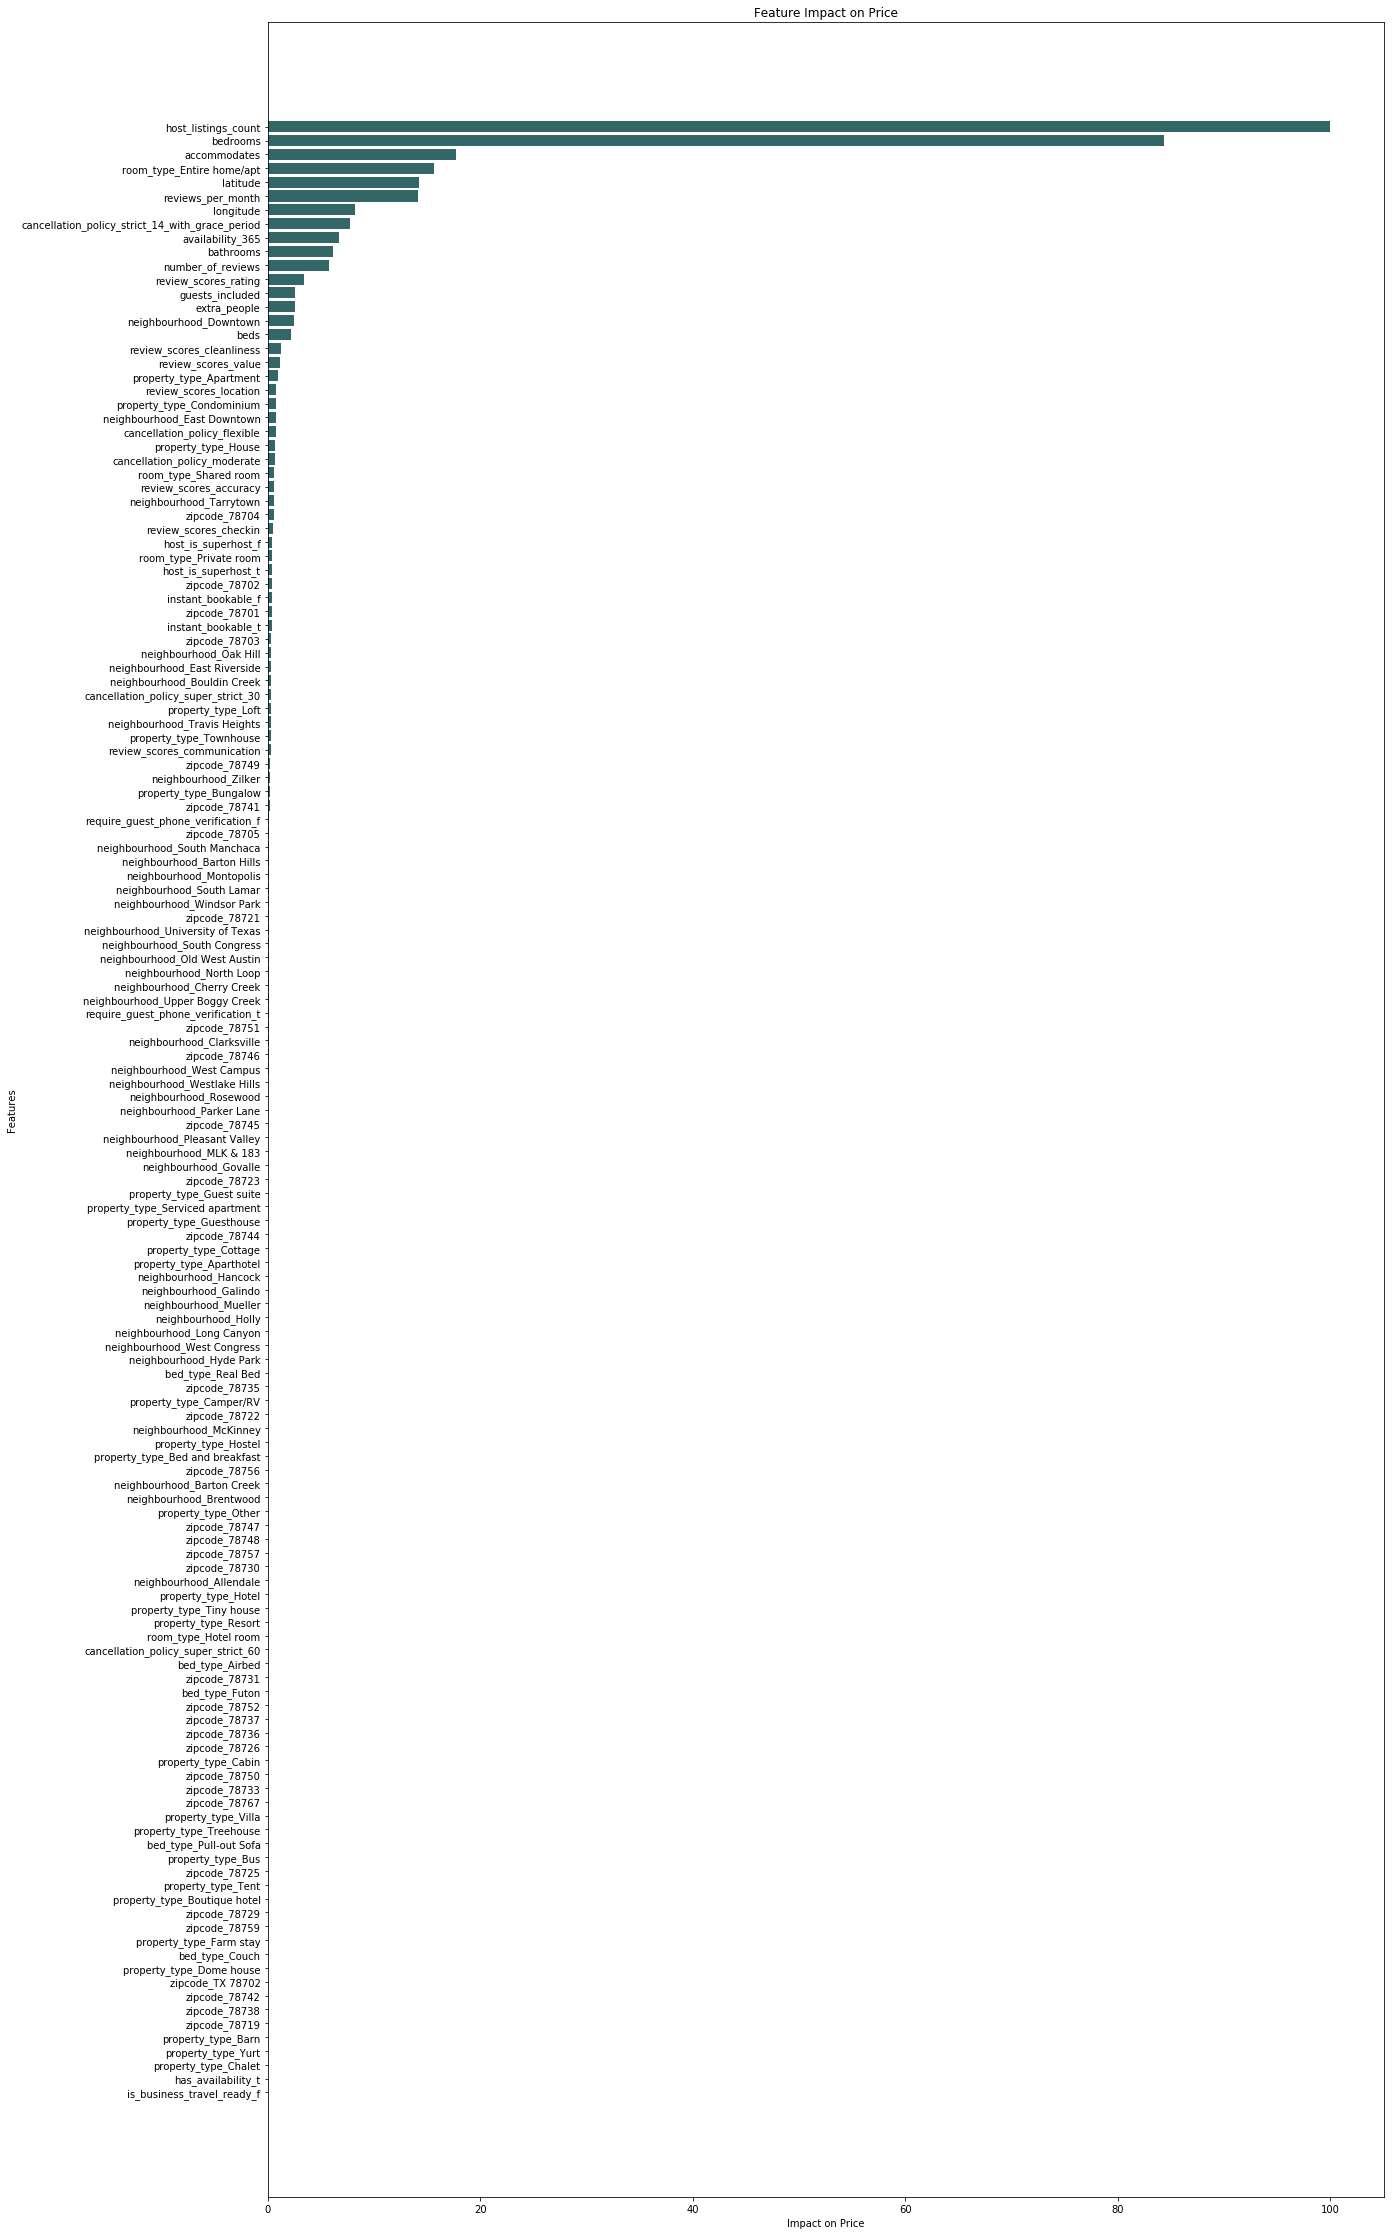

In [134]:
imp_predictors = rf_tuned.best_estimator_.feature_importances_
imp_predictors = 100 * (predictor_importance / predictor_importance.max())

#Sorting and Indexing
index = np.argsort(imp_predictors)
pos = np.arange(index.shape[0]) + 2.5
pvals = imp_predictors[index]
pcols = L_train.columns[index]

#Horizontal Bar Chart to Visualise Results
plt.figure(figsize = (20,40))
plt.barh(pos, pvals, align = 'center', color = "#336666")
plt.yticks(pos, pcols)
plt.xlabel('Impact on Price')
plt.ylabel('Features')
plt.title('Feature Impact on Price')
plt.show()

### Conclusions

From the above chart derived from the random forest tuned model, we can see that certin features like listings count, bedrooms, if the listing is an entire apartment and lattitude longitude definitely have a greater impact on the price. This is logical and makes sense because:

- Hosts with more than one listings are likely superhosts and provide a professional grade service to guests, who likely prefer it and are willing to pay a greater sum
- The number of bedrooms would cause a rise in price with the increase in bedrooms within the listing. 
- Listings that can accomodate larger groups likely have greater bedroom count and also charge more due to increased occupancy
- Lattitude and Longitude would have an impact on price due to some neighbourhoods being more favourable than others like Austin Downtown localities.
- Number of reviews per month would definiely have an impact on price because listings which tend to be booked frequently show that the listing is a good one and the stay would be pleasant. 

### Future Work

- The model currently predicts best with a Tuned Random Forest - at a R2 score of 79%. While this value is not the best, it is ~20% higher than the simple linear regression model we began with.
- For the purpose of this exercise I did not conduct any analysis on reviews and textual data - positive reviews or select amenities (hot tub, swimming pool, BBQ Amenities, Bonfire Pit etc) would definitely cause the price of an AirBnB listing to be higher. This would provide better feature engineering.
- Further Tuning of the Random Forest Model is required with a way to remove the features above with low impact scores.
- Lastly, we did not consider the occupancy dataset. This data would likely show strong trends between price and month of the year espcially around holidays because hosts tend to raise prices during these high demand days. I'm excited to persure this future work on my path to learning Python for Data Science. 